In [94]:
import RNA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import SVG, display

from collections import Counter
from collections import defaultdict
import subprocess
import difflib
import sys
import os
import random
import string
import time

import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

sys.path.append('../')
from pretty_print_path import print_moves
import findpath_librna
import findpath


In [95]:
%load_ext autoreload
%autoreload 2
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True) # no scientific notation

# import feature_generation
from features import ij_distance, new_move_dist, plt_moves, config_distance, balance_in_all_things, return_shift_moves
from process_features import fp_call, find_moves, process

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [96]:
sequence = 'AGGUGUUAUAAAAGUGCAGAGCCAAGUCACCGCCUUGCCGUCGCUUCCGCUAUGCCUCAAAAGCGGAAUAUCGAGCGAGCGAUUGUGAUUCGAAUGGUCG'
s1       = '.(((................))).((((((....(((((((((.(((((((.(......).)))))))...))).)).))))..))))))..........'
s2       = '...(((.........)))..((((((((((.(((((((((....(((((((.(......).)))))))...)).))))).).).))))))....))))..'

search_width = 60
# search_width = 500

s = s1

sw = 2
fp = findpath.findpath_single(sequence, s1, s2, search_width_multiplier=sw, mp=True)
result = fp.get_en()/100.0
path = fp.get_path()


add_moves        = set()
delete_moves     = set()
available_add    = set()
available_delete = set()

en_contrib = []

for e, tup in enumerate(path):
    i = tup[0]
    j = tup[1]
    if i<0:
        delete_moves.add((i,j))
    if i>0:
        add_moves.add((i,j))

## we are evaluating 1 node = 1 structure
## means we are evaluating ALL moves (i, j) and see if we can find any patterns

##np.mean(en_contrib) ## mean of energies
##np.std(en_contrib) ## diversity of energies


## verhaeltnis delete add moves bezogen auf accessible moves
## mean of energy
## how many add / delete moves are currently available?
## if len(available_delete)/len(delete_moves) is high, the probability
## of making a wrong decision is probably quite high. 

## -------
## true values for classifier:
## - percentage of moves which lead to the optimal result?
## - sort by energy, where is the first contribution which leads to the optimal result? 
## - look at top energy contributions: how long do we have to postpone them to get the optimal result? 


fc = RNA.fold_compound(sequence)
pt = list(RNA.ptable(s))
pt1 = list(RNA.ptable(s1))
pt2 = list(RNA.ptable(s2))

for pos, (i,j) in enumerate(find_moves(pt, pt2)):  
    if (i,j) in add_moves:
        available_add.add((i,j))
    if (i,j) in delete_moves:
        available_delete.add((i,j))
    
    # map energies somehow to [0,1] such that the network will understand.  
    en = np.interp(fc.eval_move_pt(pt, i, j)/100, [-10,10], [0,1]) 
    en_contrib.append(en)

available_add, available_delete, len(available_add)/len(add_moves), len(available_delete)/len(delete_moves)

# np.std(en_contrib)

({(5, 17), (6, 16), (24, 95), (32, 83)},
 {(-43, -72),
  (-42, -73),
  (-41, -74),
  (-40, -76),
  (-39, -77),
  (-38, -79),
  (-37, -80),
  (-36, -81),
  (-35, -82),
  (-4, -21),
  (-3, -22),
  (-2, -23)},
 0.25,
 1.0)

In [4]:
# [   0,    0 ] .(((................))).((((((....(((((((((.(((((((.(......).)))))))...))).)).))))..))))))..........  -23.10 0.125
# [  -4,  -21 ] .((..................)).((((((....(((((((((.(((((((.(......).)))))))...))).)).))))..))))))..........  -20.70 0.1875
# [  -3,  -22 ] .(....................).((((((....(((((((((.(((((((.(......).)))))))...))).)).))))..))))))..........  -17.70 0.0
# [  -2,  -23 ] ........................((((((....(((((((((.(((((((.(......).)))))))...))).)).))))..))))))..........  -21.90 0.05882
# [  23,   96 ] ......................(.((((((....(((((((((.(((((((.(......).)))))))...))).)).))))..)))))).....)....  -18.10 0.0
# [  22,   97 ] .....................((.((((((....(((((((((.(((((((.(......).)))))))...))).)).))))..)))))).....))...  -21.00 0.0
# [  24,   95 ] .....................(((((((((....(((((((((.(((((((.(......).)))))))...))).)).))))..))))))....)))...  -23.60 0.0
# [  21,   98 ] ....................((((((((((....(((((((((.(((((((.(......).)))))))...))).)).))))..))))))....))))..  -25.20 0.07692
# [ -35,  -82 ] ....................((((((((((.....((((((((.(((((((.(......).)))))))...))).)).)))...))))))....))))..  -23.60 0.08333
# [ -36,  -81 ] ....................((((((((((......(((((((.(((((((.(......).)))))))...))).)).))....))))))....))))..  -22.70 0.1667
# [ -37,  -80 ] ....................((((((((((.......((((((.(((((((.(......).)))))))...))).)).).....))))))....))))..  -19.10 0.0
# [ -38,  -79 ] ....................((((((((((........(((((.(((((((.(......).)))))))...))).)).......))))))....))))..  -20.00 0.1667
# [ -39,  -77 ] ....................((((((((((.........((((.(((((((.(......).)))))))...))).)........))))))....))))..  -17.40 0.0
# [ -40,  -76 ] ....................((((((((((..........(((.(((((((.(......).)))))))...)))..........))))))....))))..  -19.70 0.0
# [  32,   83 ] ....................((((((((((.(........(((.(((((((.(......).)))))))...)))........).))))))....))))..  -18.10 0.0
# [  33,   81 ] ....................((((((((((.((.......(((.(((((((.(......).)))))))...)))......).).))))))....))))..  -17.10 0.0
# [  34,   79 ] ....................((((((((((.(((......(((.(((((((.(......).)))))))...)))....).).).))))))....))))..  -16.30 0.0
# [  35,   78 ] ....................((((((((((.((((.....(((.(((((((.(......).)))))))...)))...)).).).))))))....))))..  -17.90 0.0
# [  36,   77 ] ....................((((((((((.(((((....(((.(((((((.(......).)))))))...)))..))).).).))))))....))))..  -19.50 0.0
# [  37,   76 ] ....................((((((((((.((((((...(((.(((((((.(......).)))))))...))).)))).).).))))))....))))..  -21.50 0.0
# [  38,   75 ] ....................((((((((((.(((((((..(((.(((((((.(......).)))))))...)))))))).).).))))))....))))..  -24.60 0.0
# [ -41,  -74 ] ....................((((((((((.(((((((...((.(((((((.(......).)))))))...)).))))).).).))))))....))))..  -23.20 0.0
# [ -42,  -73 ] ....................((((((((((.(((((((....(.(((((((.(......).)))))))...)..))))).).).))))))....))))..  -19.90 0.0
# [ -43,  -72 ] ....................((((((((((.(((((((......(((((((.(......).)))))))......))))).).).))))))....))))..  -22.70 0.0
# [  39,   73 ] ....................((((((((((.((((((((.....(((((((.(......).)))))))....).))))).).).))))))....))))..  -21.90 0.0
# [  40,   72 ] ....................((((((((((.(((((((((....(((((((.(......).)))))))...)).))))).).).))))))....))))..  -25.20 0.0
# [   5,   17 ] ....(...........)...((((((((((.(((((((((....(((((((.(......).)))))))...)).))))).).).))))))....))))..  -21.20 0.0
# [   6,   16 ] ....((.........))...((((((((((.(((((((((....(((((((.(......).)))))))...)).))))).).).))))))....))))..  -23.70 0.0

In [97]:
def adjust_pt(pt, i, j):
    pt_adj = pt.copy()
    if i<0:
        pt_adj[-i] = 0
        pt_adj[-j] = 0
    else:
        pt_adj[i] = j
        pt_adj[j] = i
    return pt_adj

In [6]:

sequence = 'CCUCUUGGCAAGGAACUGUUGUAUGACGGUACGUAACGCGCGCCAGAGCUCAAGAUUCAAACGGCGGCUUCAGAACUCAGUCAGGCGAAGAAGCCAGCAC'
s1       = '.......((.(.(.((((((....)))))).).)...))........................((((((((....((......))....)))))).))..'
s2       = '.(((.((((..(..((((((....)))))).).........)))))))...............((((((((....((......))....)))))).))..'

# sequence = 'GAGACCGAUACGAUUAAGCCAGAAUUCCAAUGAUUUGGGGAUCGGGGCUGUUUAGUCUCGUUUAAUCCCGGCGAUGUCUGGGUCAUAUUGUCCGUUAACC' 
# s1       = '(.((.(((((.(((....(((((..(((((....)))(((..(((((((....)))))))......)))...))..)))))))).)))))))).......'
# s2       = '.((((.((.((.....((((.((.((((((....)))))).))..)))).....)).))))))...(((((......)))))..................'

sequence = 'GACUGCCUCAAUUUCCACUUCGCCACAAUGUGAGGUCUCAUUCAACUGCCGCUCAUAAUGGUCGGUCAAUGAGGUCCAUCCGGUCCCUCCAGCCUGGCUA'
s1       = '.....................((((...((..((..((((((..((((((.........)).)))).))))))............).).))...))))..'
s2       = '.....................((((...((.((((.((...(((...((((((......)).))))...)))((.....)))).)).))))...))))..'



# alternative
filename_samples = f'./dataset_100_large.csv'
samples_df = pd.read_csv(filename_samples)
for index, row in samples_df.iterrows():
    if index != 192:
        continue
    sequence = row.sequence
    s1 = row.s1
    s2 = row.s2


In [98]:
# which nodes do we permutate first? in principle, this is a simlar concept as the findpath search width, where we just
# use the sw. to perform a look-ahead

## IDEA
# check how many moves out of all choices are net-negative. 

search_width_multiplier = 2



fc = RNA.fold_compound(sequence)
pt1 = list(RNA.ptable(s1))
pt2 = list(RNA.ptable(s2))

# for i,j in find_moves(pt1, pt2):    
#     pt = adjust_pt(pt1, i, j)
#     s = RNA.db_from_ptable(pt)
#     search_width = 1
#     sE, path = findpath_librna.pathfinder(sequence, s, s2, search_width=search_width, return_paths=True)
#     en = fc.eval_move_pt(pt1, i, j)
#     # print_moves(sequence, s, s2, path)
#     print (s, i, j, en, sE)

# def structure_evaluation(sequence, s, s2):
def structure_evaluation(sequence, pt1, pt2):
    avail_moves = []
    fp_results = []
    en_contrib = []

    available_add = set()
    available_delete = set()

    # pt1 = list(RNA.ptable(s))
    # pt2 = list(RNA.ptable(s2))
    for pos, (i,j) in enumerate(find_moves(pt1, pt2)):    
        next_en = fc.eval_move_pt(pt1, i, j)
        # mark where we found our move    
        # map energies somehow to [0,1] such that the network will understand.  
        en = np.interp(next_en/100, [-10,10], [0,1]) 
        en_contrib.append(en)
        avail_moves.append((i, j, next_en))

        if i>0:
            available_add.add((i,j))
        elif i<0:
            available_delete.add((i,j))

    if len(avail_moves)==0:
        add_delete = 0
    else:
        add_delete = len(available_delete)/len(avail_moves)



    # print ('best', en_contrib[0], 'avg', en_mean)

    avail_moves.sort(key=lambda x: x[2])

    # print ('avail add', available_add)
    # print ('avail del', available_delete)

    for pos, (i,j, en) in enumerate(avail_moves):  
        pt = adjust_pt(pt1, i, j)
        snew = RNA.db_from_ptable(pt)
        # if i > 0:
        #     snew = s[:i-1] + "(" + s[i:j-1] + ")" + s[j:]
        # if i < 0:
        #     snew = s[:-i-1] + "." + s[-i:-j-1] + "." + s[-j:]

        ptnew = list(RNA.ptable(snew))
        result_new, path = fp_call(sequence, snew, s2, search_width_multiplier)
        fp_results.append(result_new)

    if len(avail_moves) == 0:
        label = 0
        en_mean = 0
        en_std = 0
        best_en = 0


    else:
        label = np.argmin(fp_results)/len(fp_results)

        en_mean = np.mean(en_contrib)
        en_std = np.std(en_contrib)
        en_contrib.sort(key=lambda x: x)
        en_diff = en_contrib[0] / en_mean # best en, relative

        best_en = en_contrib[0]


    
    return label, en_mean, en_std, best_en
    return label, en_mean, en_diff, avail_moves[0:3], best_en

    print (avail_moves)
    print (fp_results)
    print (best_result)

# structure_evaluation(sequence, s, s2)
# structure_evaluation(sequence, pt1, pt2)

search_width = 500
# sE, path = findpath_librna.pathfinder(sequence, s1, s2, search_width=search_width, return_paths=True)
sE, path = fp_call(sequence, s1, s2, search_width_multiplier)
# en = fc.eval_move_pt(pt1, i, j)

ptlast = pt1.copy()
for i, j, en in path:
    if i==0: 
        continue
    # if i not in random_moves:
    #     continue

    pt = adjust_pt(ptlast, i, j)


    label, en_mean, en_std, bm = structure_evaluation(sequence, pt, pt2)

    print (RNA.db_from_ptable(pt)[0:100], round(label,4), (i,j), en_mean, en_std, bm)
    # print (RNA.db_from_ptable(pt)[0:100], i, j, best_result)
    
    ptlast = pt




# print_moves(sequence, s1, s2, path)


# while loop - increase sw from 1 onwards until we find the optimal path. how easy is the next decision?


.((..................)).((((((....(((((((((.(((((((.(......).)))))))...))).)).))))..)))))).......... 0.1875 (-4, -21) 0.6875 0.0655267121104058 0.555
.(....................).((((((....(((((((((.(((((((.(......).)))))))...))).)).))))..)))))).......... 0.0 (-3, -22) 0.6703333333333333 0.12324050560681024 0.29
........................((((((....(((((((((.(((((((.(......).)))))))...))).)).))))..)))))).......... 0.0588 (-2, -23) 0.7111764705882353 0.07517683880973984 0.555
........................((((((.....((((((((.(((((((.(......).)))))))...))).)).)))...)))))).......... 0.3125 (-35, -82) 0.70875 0.08395497305103493 0.535
......................(.((((((.....((((((((.(((((((.(......).)))))))...))).)).)))...)))))).....).... 0.0 (23, 96) 0.6489999999999999 0.13999047586651506 0.355
.....................((.((((((.....((((((((.(((((((.(......).)))))))...))).)).)))...)))))).....))... 0.0 (22, 97) 0.6553571428571429 0.13596827736269806 0.37000000000000005
.....................(((((((((.....((((((((

In [8]:
sE, path = fp_call(sequence, s1, s2, search_width_multiplier)


In [185]:
filename_samples = f'./dataset_100_large.csv'
samples_df = pd.read_csv(filename_samples)
sequence = ''
s1 = ''
s2 = ''
# good example? 22 37

df = pd.DataFrame()
all_results = []

for index, row in samples_df.iterrows():
    # if index != 90:
    #     continue


    sequence = row.sequence
    s1 = row.s1
    s2 = row.s2


    bp_dist = RNA.bp_distance(s1, s2)
    # print (sequence)
    # print (s1)
    # print (s2)
    # print (bp_dist)

    # random_move = random.choice(range(bp_dist))

    fc = RNA.fold_compound(sequence)
    pt1 = list(RNA.ptable(s1))
    pt2 = list(RNA.ptable(s2))
    # structure_evaluation(sequence, pt1, pt2)

    sE, path = fp_call(sequence, s1, s2, search_width_multiplier)

    # print (path)
    path = path[0:-10] # ignore the last moves, we're not interested in meaningless decisions
    # print (path)

    random_moves = random.choices([i[0] for i in path], k=3)
    # print (random_moves)
    # print (len(path))

    ptlast = list(RNA.ptable(s1))

    all_evals = 0
    results = []

    # find a random structure in the path
    for i, j, en in path:
        if i==0: 
            continue
        # if i not in random_moves:
        #     continue

        pt = adjust_pt(ptlast, i, j)
        # print (i, RNA.db_from_ptable(pt))

        if i in random_moves:
            label, en_mean, en_std, best_en = structure_evaluation(sequence, pt, pt2)
            results.append((sequence, RNA.db_from_ptable(pt), s2, i, label/100, label, en_mean, en_std, best_en))
            all_evals += label       
            # print (i, eval)  

        ptlast = pt

    if all_evals != 0:
        all_results += results


    # break

    if index%10 == 0:        
        print (index, end=" ")
        # print (all_results)
        df = pd.DataFrame(all_results, columns=['sequence', 's', 's2', 'i', 'j', 'target', 'en_mean', 'en_std', 'best_en'])# .set_index('sequence')
        filename = f'./move_diversity.csv'
        df.to_csv(filename)

    if index == 1000:
        break



0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600 610 620 630 640 650 660 670 680 690 700 710 720 730 740 750 760 770 780 790 800 810 820 830 840 850 860 870 880 890 900 910 920 930 940 950 960 970 980 990 1000 

## tf part

In [186]:
input_file = "move_diversity.csv"

dataframe = pd.read_csv(input_file, index_col=0)
# dataframe['target'] = np.where(dataframe["3"]==1, 1, 0)
dataframe = dataframe.drop(labels="s", axis=1)
dataframe = dataframe.drop(labels="sequence", axis=1)
dataframe = dataframe.drop(labels="s2", axis=1)
dataframe = dataframe.drop(labels="i", axis=1)
# dataframe = dataframe.drop(labels="j", axis=1)
# dataframe = dataframe.drop(labels="found", axis=1)

dataframe

,j,target,en_mean,en_std,best_en
0,0.001667,0.166667,0.705833,0.077078,0.540
1,0.000000,0.000000,0.595000,0.126254,0.345
2,0.000000,0.000000,0.683611,0.102508,0.445
3,0.000000,0.000000,0.690588,0.079073,0.545
4,0.002000,0.200000,0.678000,0.032802,0.625
...,...,...,...,...,...
1528,0.000000,0.000000,0.656429,0.096943,0.430
1529,0.000000,0.000000,0.650833,0.096821,0.470
1530,0.000000,0.000000,0.680000,0.124479,0.415
1531,0.000000,0.000000,0.700000,0.077881,0.600


In [24]:
train, test = train_test_split(dataframe, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

# list(train["target"])
# list(train["j"])

102 train examples
26 validation examples
33 test examples


In [91]:
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

X.shape, y.shape

((40, 1), (40,))

In [92]:
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

X = np.array([test["j"]]).T
y = np.array(test["target"])

X,y
X.shape, y.shape


((33, 1), (33,))

## feature selection

In [80]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)



Coefficients: 
 [100.]
Mean squared error: 0.00
Coefficient of determination: 1.00


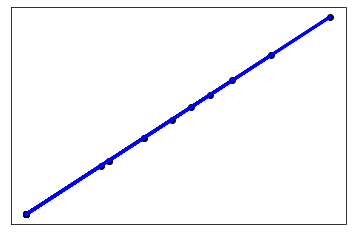

In [93]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
# diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X, diabetes_y = X, y

# Use only one feature
# diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

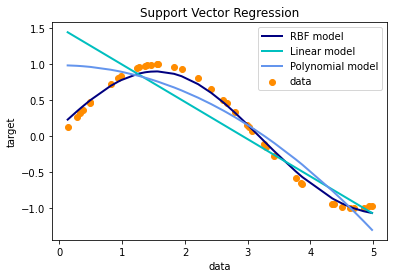

In [81]:
lw = 2
plt.scatter(X, y, color='darkorange', label='data')
# plt.hold('on')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()


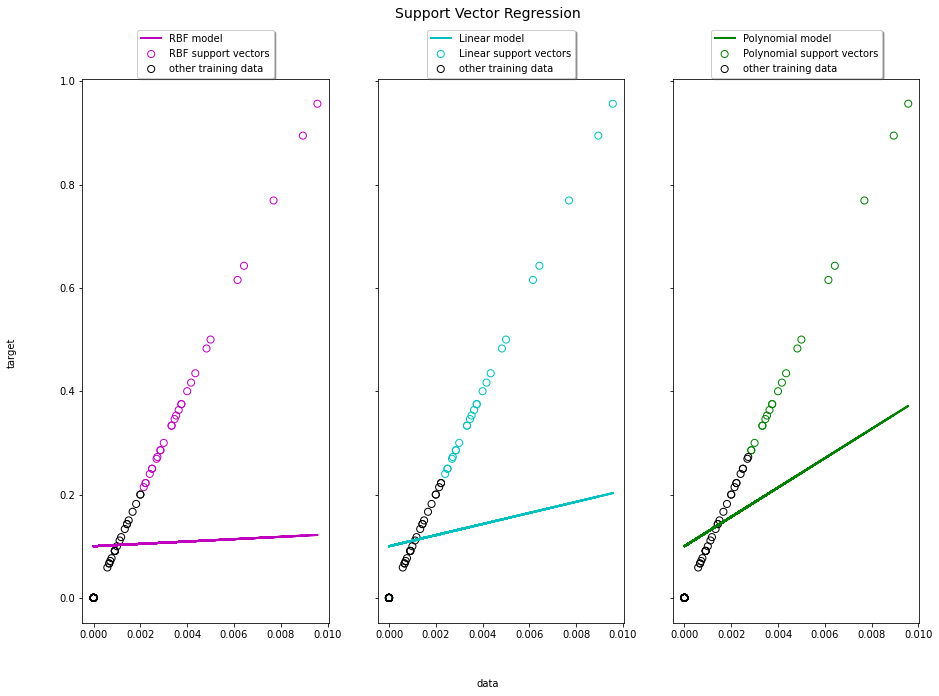

In [54]:


# #############################################################################
# Add noise to targets
# y[::5] += 3 * (0.5 - np.random.rand(8))
# y[::5] += 3 * (0.5 - np.random.rand(21))

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

# #############################################################################
# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

## tf regression

In [292]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


input_file = "move_diversity.csv"
input_file = "move_diversity2.csv"
dataframe = pd.read_csv(input_file, index_col=0)
# dataframe['target'] = np.where(dataframe["3"]==1, 1, 0)
dataframe = dataframe.drop(labels="s", axis=1)
dataframe = dataframe.drop(labels="sequence", axis=1)
dataframe = dataframe.drop(labels="s2", axis=1)
dataframe = dataframe.drop(labels="i", axis=1)
dataframe = dataframe.drop(labels="j", axis=1)

# dataframe = dataframe.drop(labels="vic", axis=1)
# dataframe = dataframe.drop(labels="vic_best", axis=1)

# dataframe = dataframe.drop(labels="unique_moves", axis=1)
# dataframe = dataframe.drop(labels="distlast", axis=1)

# dataframe = dataframe.drop(labels="found", axis=1)

dataframe

,target,en_mean,en_std,best_en,vic,vic_best,unique_moves,distlast
0,0.035714,0.698929,0.088068,0.435,1,1,0.090909,0.010
1,0.000000,0.715000,0.076352,0.555,0,0,0.100000,0.130
2,0.000000,0.660333,0.134182,0.335,1,1,0.166667,0.010
3,0.000000,0.691667,0.079004,0.570,0,0,0.166667,0.140
4,0.272727,0.680909,0.067851,0.605,0,0,0.250000,0.340
...,...,...,...,...,...,...,...,...
1081,0.000000,0.663846,0.092511,0.385,1,1,0.166667,0.010
1082,0.111111,0.671667,0.042622,0.585,0,0,0.250000,0.450
1083,0.111111,0.681667,0.058595,0.600,1,0,0.333333,0.105
1084,0.000000,0.677500,0.069597,0.580,0,0,0.333333,0.020


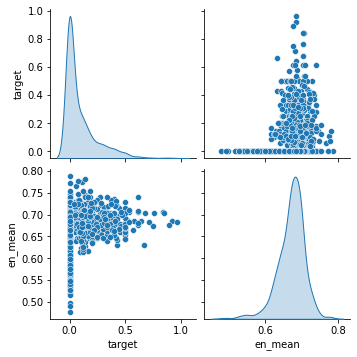

In [326]:
# sns.pairplot(dataframe[['target', 'best_en']], diag_kind='kde')
sns.pairplot(dataframe[['target', 'en_mean']], diag_kind='kde')

In [293]:
train_dataset = dataframe.sample(frac=0.8, random_state=0)
test_dataset = dataframe.drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('target')
test_labels = test_features.pop('target')

train_features

# train_dataset.describe().transpose()[['mean', 'std']]



,en_mean,en_std,best_en,vic,vic_best,unique_moves,distlast
204,0.677353,0.077538,0.535,1,0,0.166667,0.215
183,0.627917,0.139694,0.350,1,1,0.200000,0.010
356,0.690714,0.071219,0.570,2,0,0.142857,0.215
1013,0.695000,0.086584,0.575,0,0,0.142857,0.235
272,0.651667,0.035316,0.585,1,0,0.333333,0.660
...,...,...,...,...,...,...,...
735,0.716500,0.086112,0.525,1,0,0.166667,0.175
129,0.683500,0.101046,0.540,0,0,0.333333,0.360
349,0.639545,0.098959,0.470,2,1,0.166667,0.010
111,0.678611,0.108292,0.350,1,1,0.250000,0.010


In [190]:
# horsepower = np.array(train_features['en_mean'])

# horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
# horsepower_normalizer.adapt(horsepower)

# horsepower_model = tf.keras.Sequential([
#     horsepower_normalizer,
#     layers.Dense(units=1)
# ])

# horsepower_model.summary()
# horsepower_model.predict(horsepower[:10])

# horsepower_model.compile(
#     optimizer=tf.optimizers.Adam(learning_rate=0.1),
#     loss='mean_absolute_error')

# history = horsepower_model.fit(
# train_features['en_mean'],
# train_labels,
# epochs=100,
# # Suppress logging.
# verbose=1,
# # Calculate validation results on 20% of the training data.
# validation_split = 0.2)

# def plot_loss(history):
#   plt.plot(history.history['loss'], label='loss')
#   plt.plot(history.history['val_loss'], label='val_loss')
#   plt.ylim([0, 10])
#   plt.xlabel('Epoch')
#   plt.ylabel('Error [MPG]')
#   plt.legend()
#   plt.grid(True)

# # history
# plot_loss(history)

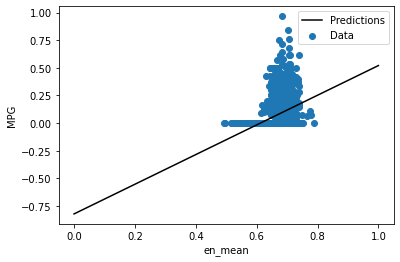

In [267]:
test_results = {}

test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['en_mean'],
    test_labels, verbose=0)

x = tf.linspace(0.0, 1, 2)
y = horsepower_model.predict(x)

def plot_horsepower(x, y):
  plt.scatter(train_features['en_mean'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('en_mean')
  plt.ylabel('MPG')
  plt.legend()


plot_horsepower(x,y)

## linear regression with multiple inputs

In [219]:
# normalizer = tf.keras.layers.Normalization(axis=-1)
# normalizer.adapt(np.array(train_features))

# linear_model = tf.keras.Sequential([
#     normalizer,
#     layers.Dense(units=1)
# ])

# # linear_model.predict(train_features[:10])
# # linear_model.layers[1].kernel

# linear_model.compile(
#     optimizer=tf.optimizers.Adam(learning_rate=0.1),
#     loss='mean_absolute_error')

# history = linear_model.fit(
#     train_features,
#     train_labels,
#     epochs=100,
#     # Suppress logging.
#     # verbose=0,
#     # Calculate validation results on 20% of the training data.
#     validation_split = 0.2)

# plot_loss(history)

In [220]:
# linear_model.evaluate(
#     test_features, test_labels, verbose=0)

## Regression with a deep neural network (DNN)

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_34 (Normalizat (None, 7)                 15        
_________________________________________________________________
dense_101 (Dense)            (None, 128)               1024      
_________________________________________________________________
dense_102 (Dense)            (None, 128)               16512     
_________________________________________________________________
dropout_24 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_103 (Dense)            (None, 1)                 129       
Total params: 17,680
Trainable params: 17,665
Non-trainable params: 15
_________________________________________________________________
Epoch 1/100
22/22 [==============================] - 0s 5ms/step - loss: 0.1606 - val_loss: 0.1100
Epoch 2/100
22/

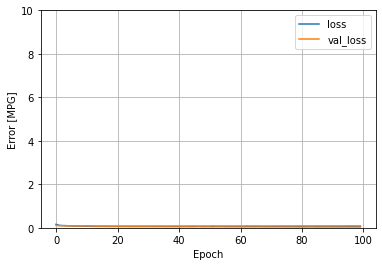

In [322]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(128, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dropout(.2),
      # layers.Dropout(.5),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=1, epochs=100)

plot_loss(history)

In [347]:
dnn_model.evaluate(test_features, test_labels, verbose=0)


data = {'en_mean': [0.678000],
        'en_std': 0.0328022,
        'best_en': 0.625,
        'vic': 0,
        'vic_best': 0,
        'unique_moves': 1,
        'distlast': 0.130}

test_features2 = pd.DataFrame.from_dict(data)

test_features2

,en_mean,en_std,best_en,vic,vic_best,unique_moves,distlast
0,0.678,0.032802,0.625,0,0,1,0.13


## Predictions

INFO:tensorflow:Assets written to: dnn_model/assets


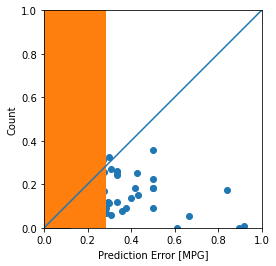

In [340]:
dnn_model.save('dnn_model')

test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [341]:
test_predictions = dnn_model.predict(test_features).flatten()

for i, j in zip(test_labels, test_predictions):

    print (i, j)



0.2 0.07429442
0.0 4.472538e-05
0.0 4.472538e-05
0.0 4.3352895e-05
0.1111111111111111 0.18601203
0.0 3.711747e-05
0.4 0.13850085
0.2777777777777778 0.10596704
0.0 4.472538e-05
0.1428571428571428 0.22384399
0.0 4.472538e-05
0.0 0.041995477
0.0 4.472538e-05
0.0 4.472538e-05
0.0 4.472538e-05
0.0 4.472538e-05
0.0 0.0032599715
0.0 4.472538e-05
0.3076923076923077 0.2702597
0.0 4.472538e-05
0.0 4.472538e-05
0.0 4.472538e-05
0.0 0.08404856
0.1333333333333333 0.14958562
0.375 0.092126995
0.1666666666666666 0.2834147
0.1111111111111111 0.14198765
0.2 0.24541606
0.92 0.0074595613
0.0 4.472538e-05
0.0 4.462917e-05
0.0 4.472538e-05
0.0 0.26604906
0.4285714285714285 0.2506371
0.0 0.050544195
0.5 0.09279278
0.0909090909090909 0.095017955
0.0 4.472538e-05
0.5 0.22379991
0.0714285714285714 0.11383397
0.0 4.472538e-05
0.2307692307692307 0.12177127
0.3 0.3262895
0.0 4.472538e-05
0.0 0.0003081929
0.3571428571428571 0.078334555
0.0 4.472538e-05
0.0 4.472538e-05
0.2857142857142857 0.06911532
0.0 0.005162881